_Lambda School Data Science_

# Sequence your narrative

Create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv

### Stretch goals
- [ipywidgets](https://github.com/jupyter-widgets/ipywidgets)
- [Matplotlib animation](https://matplotlib.org/examples/animation/index.html)
- [Connected scatter plots](http://www.thefunctionalart.com/2012/09/in-praise-of-connected-scatter-plots.html)
- [Idyll markup language](https://idyll-lang.org/) for "scrollytelling"

Variables --> Visual Encodings 
 
  - Income --> x-axis
  - Lifespan --> y-axis
  - Region --> color
  - Population --> bubble size
  - Year --> animation sequence(alternative: small multiple)
  - Country --> annotations
 
Qualitative --> Verbal
  - Editorial / contexual explanation --> audio narration (alternative: text)
 

In [1]:
!pip install --upgrade seaborn

    100% |████████████████████████████████| 215kB 24.7MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
incomes = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')
life_exp = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [4]:
incomes.shape, life_exp.shape, population.shape, entities.shape, concepts.shape

((44268, 3), (44370, 3), (51939, 3), (273, 33), (590, 16))

In [5]:
pd.options.display.max_columns = None
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [8]:
incomes.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,abw,1800,833
1,abw,1801,833
2,abw,1802,833
3,abw,1803,833
4,abw,1804,833


In [6]:
concepts.head() # data dictionary

,concept,color,concept_type,description,description_long,domain,drill_up,indicator_url,name,name_catalog,name_short,scales,source,source_long,source_url,tags
0,adults_with_hiv_percent_age_15_49,NaN,measure,The estimated percentage of adults aged 15 to ...,NaN,NaN,NaN,NaN,"Adults with HIV (%, age 15-49)","Adults with HIV (%, age 15-49)",Adults with HIV,"[""log"", ""linear""]",NaN,NaN,http://www.gapminder.org/gapminder-world/docum...,hiv
1,age_at_1st_marriage_women,NaN,measure,"The mean age, in years, of first marriage for ...",NaN,NaN,NaN,NaN,Age at 1st marriage (women),Age at 1st marriage (women),Age at 1st marriage,"[""linear"", ""log""]",NaN,NaN,http://spreadsheets.google.com/pub?key=t4eF8H_...,population
2,aged_15_24_employment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 employment rate (%),Aged 15-24,Employment rate (%),"[""linear"", ""log""]",NaN,NaN,http://ilo.org/legacy/english/global-reports/k...,employment_rate
3,aged_15_24_unemployment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 unemployment rate (%),Aged 15-24,Unemployment rate (%),"[""linear"", ""log""]",NaN,NaN,http://ilo.org/legacy/english/global-reports/k...,unemployment
4,aged_15_64_labour_force_participation_rate_per...,NaN,measure,"For age group 15-64, percentage of all labour ...",NaN,NaN,NaN,NaN,Aged 15-64 labour force participation rate (%),Aged 15-64,Labour force participation rate (%),"[""linear"", ""log""]",NaN,NaN,http://ilo.org/legacy/english/global-reports/k...,labour_force_participation


In [0]:
df1 = pd.merge(incomes, life_exp)

In [12]:
incomes.shape, life_exp.shape, df1.shape

((44268, 3), (44370, 3), (41790, 4))

In [13]:
df1.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
0,abw,1800,833,34.42
1,abw,1801,833,34.42
2,abw,1802,833,34.42
3,abw,1803,833,34.42
4,abw,1804,833,34.42


In [14]:
entities.head() # want real name and geographic region

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [17]:
entities.world_4region.value_counts()

asia        80
europe      73
africa      61
americas    57
Name: world_4region, dtype: int64

In [18]:
entities.world_6region.value_counts()

europe_central_asia         77
sub_saharan_africa          53
america                     53
east_asia_pacific           46
middle_east_north_africa    23
south_asia                   8
Name: world_6region, dtype: int64

In [19]:
variables = ['country', 'name', 'world_6region']
entities[variables].head() # show variables, very cool filter process

,country,name,world_6region
0,abkh,Abkhazia,europe_central_asia
1,abw,Aruba,america
2,afg,Afghanistan,south_asia
3,ago,Angola,sub_saharan_africa
4,aia,Anguilla,america


In [22]:
# preview before assigning
pd.merge(df1,  entities[variables], how='inner', left_on='geo', 
         right_on='country').head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_6region
0,abw,1800,833,34.42,19286,abw,Aruba,america
1,abw,1801,833,34.42,19286,abw,Aruba,america
2,abw,1802,833,34.42,19286,abw,Aruba,america
3,abw,1803,833,34.42,19286,abw,Aruba,america
4,abw,1804,833,34.42,19286,abw,Aruba,america


In [0]:
df1 = pd.merge(df1, population)

In [24]:
# drop and rename
df1 = pd.merge(df1, entities[variables], how='inner', left_on='geo', 
               right_on='country')

df1.drop(columns=['geo', 'country'], inplace = True)

df1.rename(columns={
    'time': 'year', 
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income',
    'life_expectancy_years': 'lifespan',
    'population_total': 'population',
    'name': 'country',
    'world_6region': 'region'
}, inplace=True)

df1.shape

(41790, 6)

In [25]:
df1.head()

,year,income,lifespan,population,country,region
0,1800,833,34.42,19286,Aruba,america
1,1801,833,34.42,19286,Aruba,america
2,1802,833,34.42,19286,Aruba,america
3,1803,833,34.42,19286,Aruba,america
4,1804,833,34.42,19286,Aruba,america


In [27]:
df1.describe(exclude=[np.number])

,country,region
count,41790,41790
unique,194,6
top,Italy,europe_central_asia
freq,219,10991


In [29]:
df1.country.unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados',
       'Brunei', 'Bhutan', 'Botswana', 'Central African Republic',
       'Canada', 'Switzerland', 'Chile', 'China', "Cote d'Ivoire",
       'Cameroon', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia',
       'Comoros', 'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus',
       'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt', 'Eritrea',
       'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France',
       'Micronesia, Fed. Sts.', 'Gabon', 'United Kingdom', 'Georgia',
       'Ghana', 'Guinea', 'Gambia', 'Guinea-Bissau', 'Equatoria

In [31]:
df1.country == 'United States'

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
41760    False
41761    False
41762    False
41763    False
41764    False
41765    False
41766    False
41767    False
41768    False
41769    False
41770    False
41771    False
41772    False
41773    False
41774    False
41775    False
41776    False
41777    False
41778    False
41779    False
41780    False
41781    False
41782    False
41783    False
41784    False
41785    False
41786    False
41787    False
41788    False
41789    False
Name: country, Length: 41790, dtype: bool

In [32]:
df1[df1.country == 'United States'] # boolean indexing, aka return true

,year,income,lifespan,population,country,region
39381,1800,2127,39.41,6801854,United States,america
39382,1801,2167,39.41,6933517,United States,america
39383,1802,2202,39.41,7067728,United States,america
39384,1803,2166,39.41,7204538,United States,america
39385,1804,2165,39.41,7343995,United States,america
39386,1805,2209,39.41,7486152,United States,america
39387,1806,2251,39.41,7631061,United States,america
39388,1807,2273,39.41,7778775,United States,america
39389,1808,2113,39.41,7929348,United States,america
39390,1809,2217,39.41,8082836,United States,america


In [34]:
usa = df1[df1.country=='United States']
usa[usa.year.isin([1818, 1918, 2018])]

,year,income,lifespan,population,country,region
39399,1818,2258,39.41,9879049,United States,america
39499,1918,9371,47.18,106721812,United States,america
39599,2018,54898,79.14,326766748,United States,america


In [36]:
china = df1[df1.country=='China']
china[china.year.isin([1818,1918,2018])]

,year,income,lifespan,population,country,region
7120,1818,985,32.00,374161494,China,east_asia_pacific
7220,1918,989,22.13,462444535,China,east_asia_pacific
7320,2018,16018,76.92,1415045928,China,east_asia_pacific


In [0]:
this_year = df1[df1.year==2018]

In [39]:
print(this_year.shape)
this_year.sample(10)

(188, 6)


,year,income,lifespan,population,country,region
37192,2018,17856,70.48,5851466,Turkmenistan,europe_central_asia
2455,2018,16552,72.30,9923914,Azerbaijan,europe_central_asia
38287,2018,24881,79.61,81916871,Turkey,europe_central_asia
23786,2018,5330,72.41,4041065,Moldova,europe_central_asia
218,2018,39219,76.14,105670,Aruba,america
13280,2018,17463,67.33,2067561,Gabon,sub_saharan_africa
8634,2018,1439,68.00,832347,Comoros,sub_saharan_africa
32812,2018,2573,66.85,16294270,Senegal,sub_saharan_africa
16997,2018,26936,75.90,9688847,Hungary,europe_central_asia
34783,2018,13150,71.62,568301,Suriname,america


In [0]:
import seaborn as sns

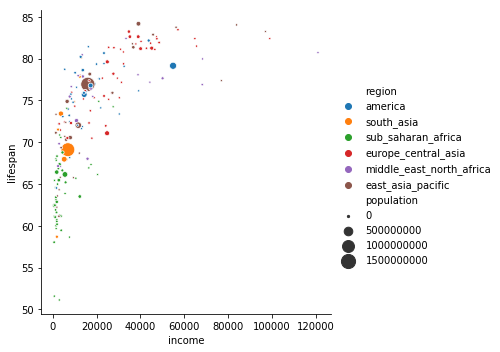

In [46]:
sns.relplot(x='income', y='lifespan', hue='region', size='population', 
            sizes=(5, 200), data=this_year);

In [49]:
this_year[this_year.income > 80000]

,year,income,lifespan,population,country,region
22910,2018,99034,82.39,590321,Luxembourg,europe_central_asia
23348,2018,97057,83.24,632418,"Macao, China",east_asia_pacific
31498,2018,121033,80.71,2694849,Qatar,middle_east_north_africa
33031,2018,83888,84.03,5791901,Singapore,east_asia_pacific


In [58]:
entities[entities.name=='Macao, China'].T

,145
country,mac
alt_5,MACAU SPECIAL ADMINISTRATIVE REGION OF CHINA
alternative_1,Macau
alternative_2,Macao
alternative_3,"China, Macao SAR"
alternative_4_cdiac,Macau
arb1,"Macao SAR, China"
arb2,NaN
arb3,NaN
arb4,NaN


In [0]:
qatar = this_year[this_year.country=='Qatar']

In [65]:
qatar.income

31498    121033
Name: income, dtype: int64

In [66]:
qatar.income.values

array([121033])

In [69]:
type(qatar.income.values)

numpy.ndarray

In [70]:
type(qatar.income.values[0])

numpy.int64

In [0]:
qatar_income = qatar.income.values[0]
qatar_lifespan = qatar.lifespan.values[0]

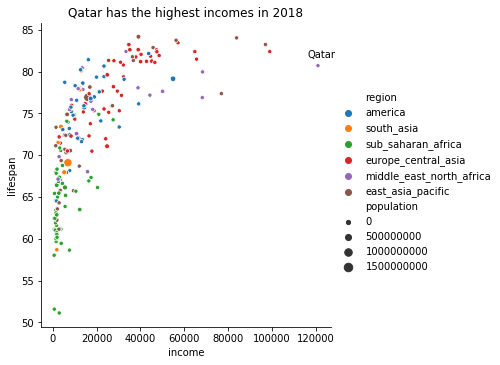

In [82]:
sns.relplot(x='income', y='lifespan', hue='region', size='population', 
          data=this_year)

plt.text(x=qatar_income-5000, y=qatar_lifespan+1, s='Qatar')

plt.title('Qatar has the highest incomes in 2018');

#plot multiyears

In [0]:
framing_years = [1818, 1918, 2018]

centuries = df1[df1.year.isin(framing_years)]

In [85]:
centuries.sample(5)

,year,income,lifespan,population,country,region
9410,1918,2688,25.77,300440,Cyprus,europe_central_asia
26480,1818,351,30.30,737000,Malawi,sub_saharan_africa
18868,1918,1185,26.50,848676,Jamaica,america
24609,1918,1669,19.97,939985,"Macedonia, FYR",europe_central_asia
34583,1818,1641,32.90,81786,Suriname,america


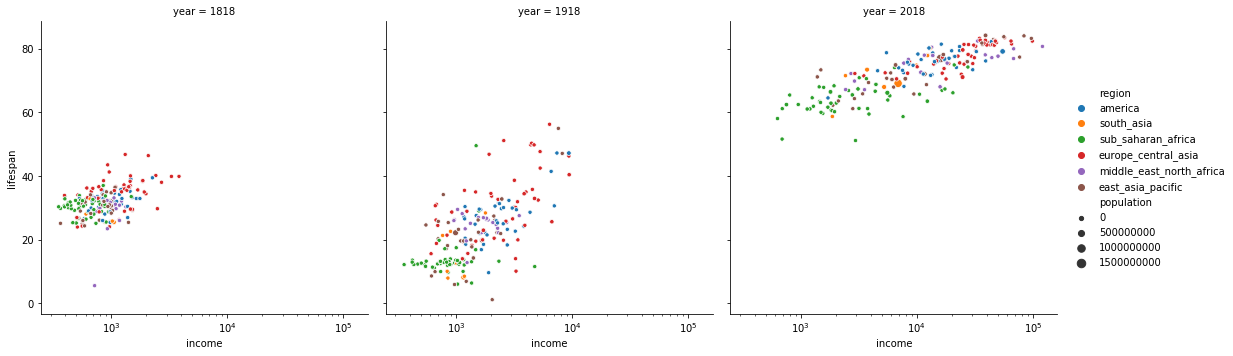

In [91]:
sns.relplot(x='income', y='lifespan', hue='region', size='population', 
            col='year', data=centuries)

plt.xscale('log');

## are country counts consistent?

In [92]:
centuries.groupby('year').country.count()

year
1818    190
1918    190
2018    188
Name: country, dtype: int64

In [94]:
years_per_country = centuries.groupby('country').year.count()
years_per_country[years_per_country < 3]

country
Greenland    2
Taiwan       2
Name: year, dtype: int64

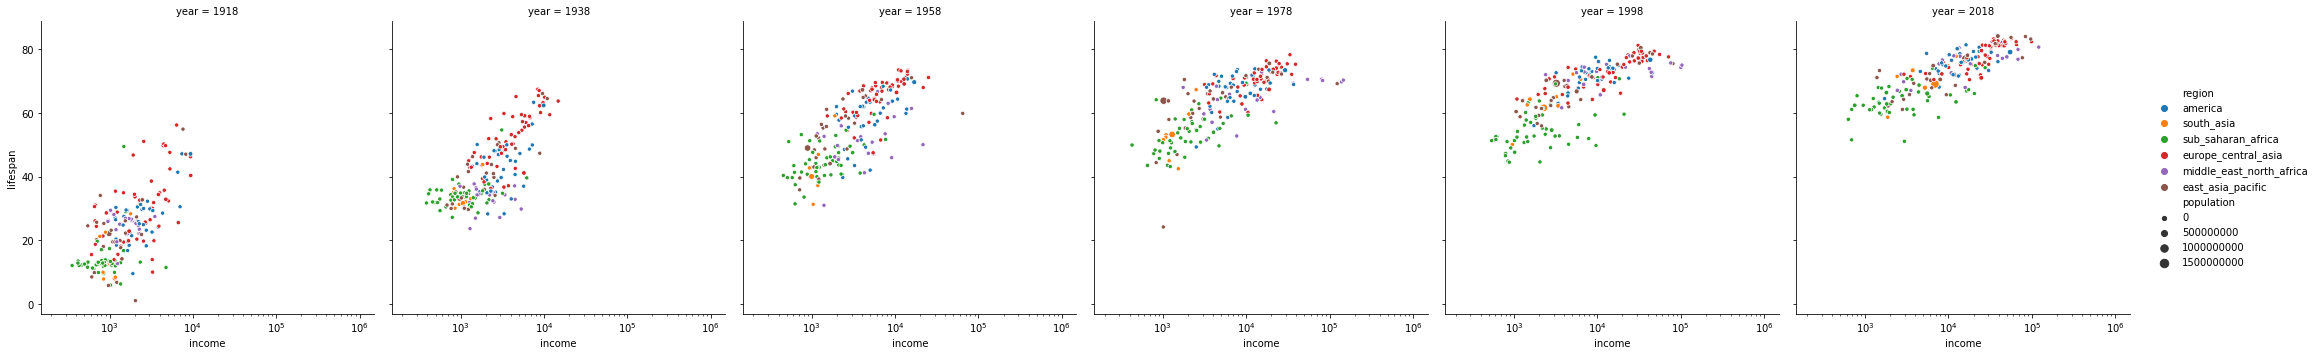

In [97]:
years = [1918, 1938, 1958, 1978, 1998, 2018]

years_subset = df1[df1.year.isin(years)]

sns.relplot(x='income', y='lifespan', hue='region', size='population', 
            col='year', data=years_subset)

plt.xscale('log')
plt.xlim(150, 1500000);

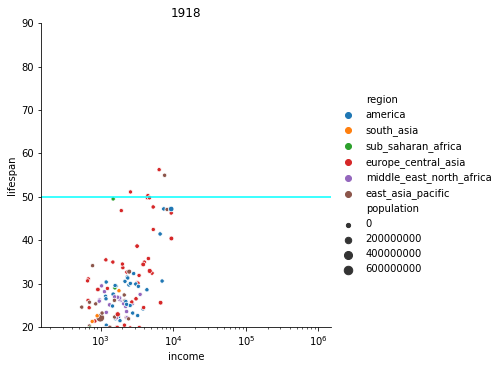

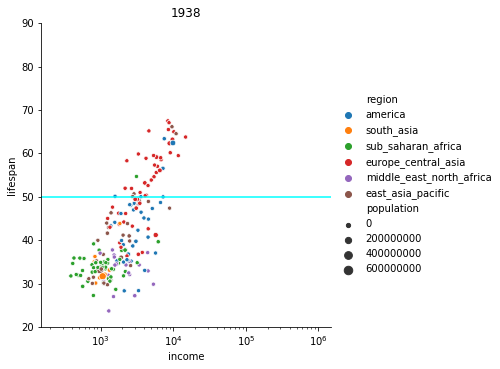

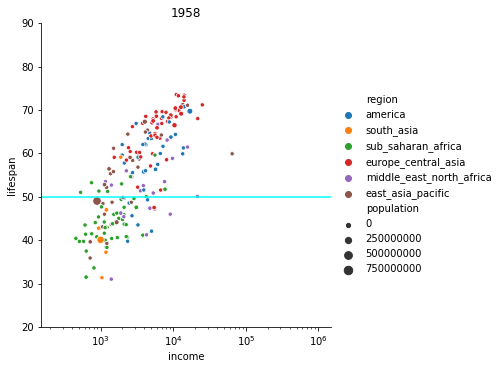

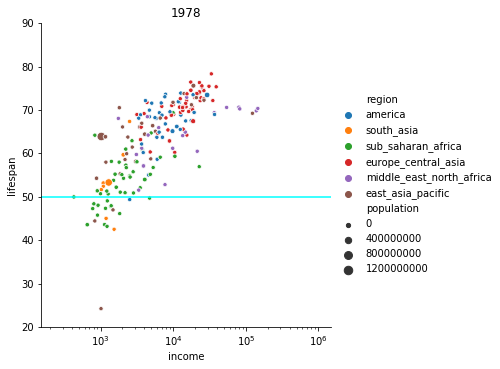

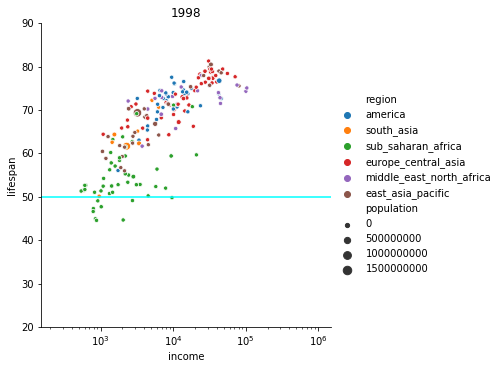

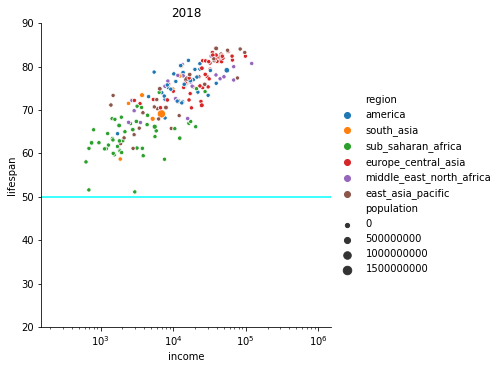

In [98]:
for year in years:

  sns.relplot(x='income', y='lifespan', hue='region', size='population', 
             data=df1[df1.year==year])

  plt.xscale('log')
  plt.xlim(150, 1500000)
  plt.ylim(20, 90)
  plt.title(year)
  plt.axhline(y=50, color='cyan')
  

In [99]:
df1[(df1.year==1918) & (df1.lifespan >= 50)]

,year,income,lifespan,population,country,region
1917,1918,7610,54.95,5066003,Australia,east_asia_pacific
10333,1918,6393,56.24,3165276,Denmark,europe_central_asia
18211,1918,2576,51.11,115504,Iceland,europe_central_asia
28113,1918,4479,50.28,2576646,Norway,europe_central_asia


## today, no countries are below 50 years lifespan

In [102]:
df1[(df1.year==2018) & (df1.lifespan < 50)]

,year,income,lifespan,population,country,region


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

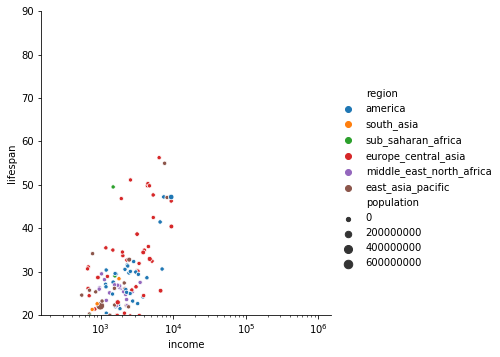

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

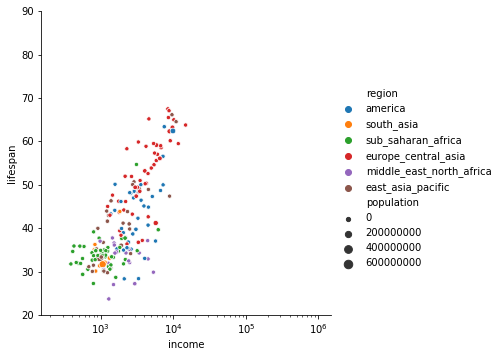

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

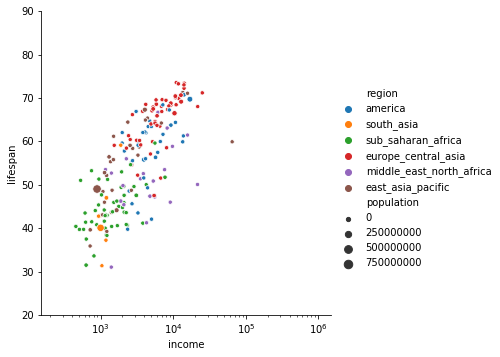

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

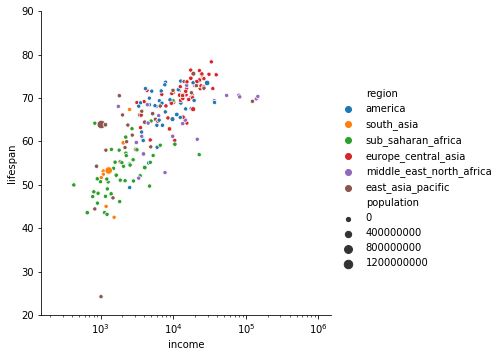

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

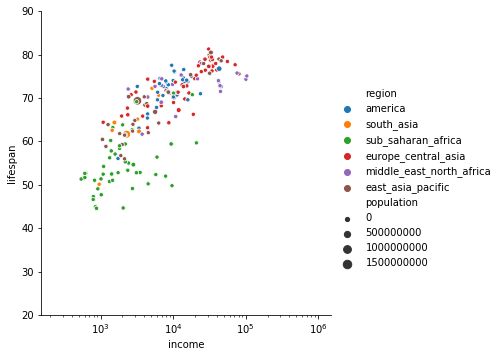

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

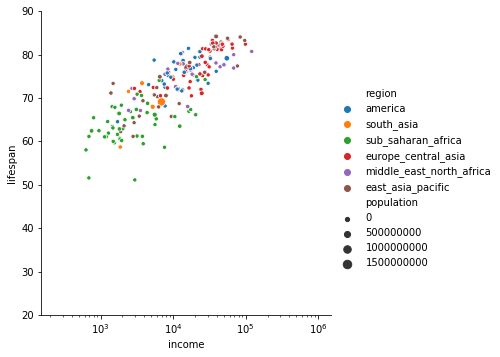

<IPython.core.display.Javascript object>

In [103]:
from google.colab import widgets
tb = widgets.TabBar([str(year) for year in years])
for tab, year in zip(tb, years):
  sns.relplot(x='income', y='lifespan', hue='region', size='population', 
             data=df1[df1.year==year])

  plt.xscale('log')
  plt.xlim(150, 1500000)
  plt.ylim(20, 90)